In [200]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
from sklearn.svm import SVC,SVR

In [201]:
data=pd.read_csv('new_dataset2.csv')

In [202]:
data=df.drop(df.columns[[1,2,3,4,6]],axis=1)

In [203]:
data.head()

,Gender,Food flavor
0,NaN,Sweet
1,Male,Spicy
2,Male,Sweet
3,Female,Spicy
4,Male,Sweet


In [204]:
data = data.fillna(method='bfill')
data.head()

,Gender,Food flavor
0,Male,Sweet
1,Male,Spicy
2,Male,Sweet
3,Female,Spicy
4,Male,Sweet


In [205]:
data.to_csv('newGender.csv')

In [206]:
data=pd.read_csv('F:\\4.2\\pattern\\Lab\\project\\newGender.csv')
data.head()

,Gender,Food_flavor
0,Male,Sweet
1,Male,Spicy
2,Male,Sweet
3,Female,Spicy
4,Male,Sweet


In [207]:
len(data[data.Gender=='Male'])


70

In [208]:
len(data[data.Food_flavor=='Sweet'])

31

In [209]:
data.loc[data["Gender"]=='Male',"Gender"]=1
data.loc[data["Gender"]=='Female',"Gender"]=0

In [210]:
data.head()

,Gender,Food_flavor
0,1,Sweet
1,1,Spicy
2,1,Sweet
3,0,Spicy
4,1,Sweet


In [211]:
data.loc[data["Food_flavor"]=='Spicy',"Food_flavor"]=1
data.loc[data["Food_flavor"]=='Sweet',"Food_flavor"]=0

In [212]:
data

,Gender,Food_flavor
0,1,0
1,1,1
2,1,0
3,0,1
4,1,0
5,1,0
6,0,1
7,0,0
8,0,0
9,0,1


In [213]:
data.to_csv('preprocessed.csv', index = False)

In [214]:
new_data = pd.read_csv('preprocessed.csv')
new_data.head()

,Gender,Food_flavor
0,1,0
1,1,1
2,1,0
3,0,1
4,1,0


In [215]:
D = new_data.values
X = D[:,:-1]
y = D[:,-1]
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25)

In [216]:
mnb = MultinomialNB()
mnb.fit(X_train,Y_train)
Y_pred = mnb.predict(X_test)
accMNB = accuracy_score(Y_test.astype(int), Y_pred.astype(int))
print('Accuracy: ',accMNB)

Accuracy:  0.7692307692307693


In [222]:
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train.astype(int), Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [223]:
yPred=clf.predict(X_test.astype(int))
acc=accuracy_score(Y_test.astype(int), yPred.astype(int))
print('Accuracy with 3 neighbours: ',acc)

Accuracy with 3 neighbours:  0.7692307692307693


In [219]:
clfSVC = SVC(kernel = 'rbf')
clfSVC.fit(X_train,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [224]:
y_pred = clfSVC.predict(X_test)
print("Accuracy:",accuracy_score(Y_test, y_pred))

Accuracy: 0.7692307692307693


In [221]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\SudiptaaRumu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


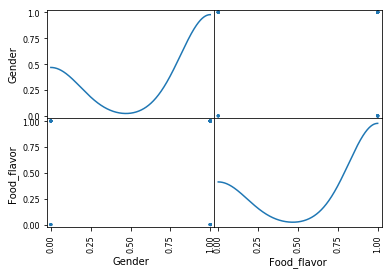

In [225]:
pd.scatter_matrix(new_data, diagonal='kde')
plt.show()